# TAREA 2
---

In [2]:
# Importamos las libreías
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from fronteras import plot_fronteras_decision, mostrar_fronteras

In [3]:
# Cargamos el dataset "iris"
df_iris = sb.load_dataset("iris")

In [4]:
# Codificamos la columna species en la columna "etiketa"
df_iris["etiketa"] = df_iris.species.astype("category").cat.codes

In [5]:
df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,etiketa
36,5.5,3.5,1.3,0.2,setosa,0
59,5.2,2.7,3.9,1.4,versicolor,1
37,4.9,3.6,1.4,0.1,setosa,0
74,6.4,2.9,4.3,1.3,versicolor,1
5,5.4,3.9,1.7,0.4,setosa,0


In [6]:
# Nos quedamos con las species de "setosa" y "virgínica" solamente
df_iris = df_iris[df_iris.species.isin(["setosa", "virginica"])]

In [7]:
df_iris.sample(100)

,sepal_length,sepal_width,petal_length,petal_width,species,etiketa
38,4.4,3.0,1.3,0.2,setosa,0
130,7.4,2.8,6.1,1.9,virginica,2
140,6.7,3.1,5.6,2.4,virginica,2
100,6.3,3.3,6.0,2.5,virginica,2
21,5.1,3.7,1.5,0.4,setosa,0
...,...,...,...,...,...,...
102,7.1,3.0,5.9,2.1,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
106,4.9,2.5,4.5,1.7,virginica,2
17,5.1,3.5,1.4,0.3,setosa,0


In [8]:
# Definimos nuestras variables predictoras
X = df_iris[["sepal_length", "sepal_width"]]
# Definimos nuestra variable objetivo
y = df_iris.etiketa

# Hacemos la partición de los datos de entrenamiento y de los datos de test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Instanciamos el modelo de Regresión Logística
mlr = LogisticRegression()
# Entrenamos el modelo
mlr.fit(X_train.values, y_train.values)

LogisticRegression()

In [9]:
mlr.score(X_train, y_train)

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.9866666666666667

In [10]:
colors = ListedColormap(["#CF672D", "#13944B", "#2D62CF"])

# Creamos la función "plot_fronteras"
def plot_fronteras(model, X, ax):
    # Muestra las fronteras de decisión de un modelo de clasificación:
    # * model: Modelo entrenado
    # * X: Array NumPy conteniendo las muestras sobre las que realizar la predicción
    # * ax: Conjunto de ejes de matplotlib en el que mostrar el resultado
    minX = min(X[:, 0]) #valor min de columna 0 de X
    maxX = max(X[:, 0])
    minY = min(X[:, 1])
    maxY = max(X[:, 1]) #valor max de columna 1 de X
    marginX = (maxX - minX) * 0.1
    marginY = (maxY - minY) * 0.1
    # linspace: genera un array NumPy formado por n números equiespaciados entre 2 dados
    # numpy.linspace(valor-inicial, valor-final, número de valores)
    xc = np.linspace(minX - marginX, maxX + marginX, 1000)
    yc = np.linspace(minY - marginY, maxY + marginY, 1000)
    Xc, Yc = np.meshgrid(xc, yc) # meshgrid devuelve matrices de coordenadas
    # ravel: para convertir un array multidimensional en un array de una sola dimensión
    Z = model.predict(np.c_[Xc.ravel(), Yc.ravel()]).reshape(Xc.shape)    
    ax.contourf(Xc, Yc, Z, levels = 2,
        colors = ["#e5c2b3", "#9ec3b6", "#69A3CF"],
        zorder = 0
    )
    
# Creamos la función "mostrar_fronteras"
def mostrar_fronteras(model, X_train = None, X_test = None, 
                      y_train = None, y_test = None, labels = [], show = True):
    
    # Muestra las fronteras de decisión de un modelo de clasificación, y muestra sobre él las observaciones 
    # de entrenamiento y de validación:
    # * model: Modelo entrenado
    # * X_train: Array NumPy con las características de entrenamiento
    # * X_test: Array NumPy con las características de validación
    # * y_train: Array NumPy con las etiquetas de entrenamiento
    # * y_test: Array NumPy con las etiquetas de validación
    # * Etiketas: Array NumPy con los identificadores de las etiquetas
    
    fig, ax = plt.subplots(figsize = (7, 7))
    ax.set_aspect("equal")
    if model != None:
        plot_fronteras(model, X_train, ax)
    # Train dataset
    scatter = plt.scatter(
        x = X_train[:, 0], y = X_train[:, 1], c = y_train,
        cmap = colors, zorder = 2, edgecolor = "#6c6960"
    )
    # Test dataset
    if not(X_test is None):
        scatter = plt.scatter(
            x = X_test[:, 0], y = X_test[:, 1], c = y_test,
            cmap = colors, zorder = 2, edgecolor = "#FFFFFF"
        )
    ax.legend(
        handles = scatter.legend_elements()[0],
        labels = list(labels)
    )

    ax.grid(color = "#f4f4f4", zorder = 1, alpha = 0.4)
    if show:
        plt.show()
    else:
        return fig, ax

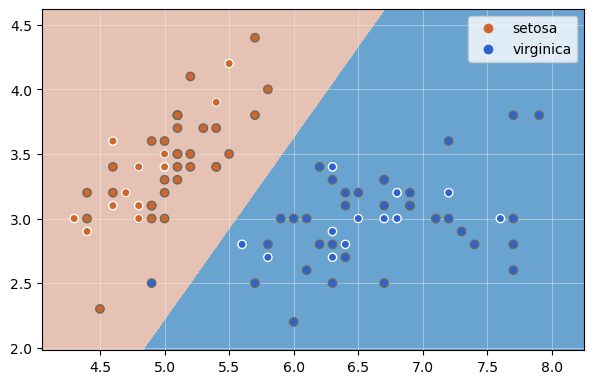

In [11]:
# Imprimios el gráfico mediante la función mostrar fronteras
mostrar_fronteras(mlr, X_train.values, X_test.values, y_train, y_test, df_iris.species.unique())

#### Calcular ahora las fronteras de decisión para las tres clases de "species"

In [12]:
# Cargamos el dataset
df_iris2 = sb.load_dataset("iris")
# Codificamos la columna species en la columna "etiketa"
df_iris2["etiketa"] = df_iris2.species.astype("category").cat.codes

In [13]:
X2 = df_iris2[["sepal_length", "sepal_width"]]
y2 = df_iris2.etiketa
X_train, X_test, y_train, y_test = train_test_split(X2, y2, random_state = 0)
mlr2 = LogisticRegression()
mlr2.fit(X_train.values, y_train.values)

LogisticRegression()

In [15]:
mlr2.score(X_train, y_train)

/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.8392857142857143

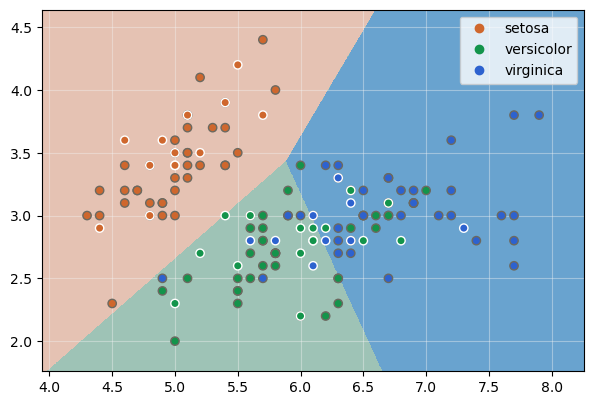

In [14]:
mostrar_fronteras(mlr2, X_train.values, X_test.values, y_train, y_test, df_iris2.species.unique())